# Summary:
- 1. Import libraries
- 2. Import data
- 3. Metadata
    - 3.1. Rename columns
    - 3.2. Change index
- 4. Explore the data
    - 4.1. Inspecting data shape, data types and missing values
        - 4.1.1. Change data types
    - 4.2. Basic descriptive statistics
    - 4.3. Identifying duplicated records
- 5. Modify the data
    - 5.1. Correct categorical values
        - 5.1.1. fuel_type
        - 5.1.2. transmission
        - 5.1.3. brand
        - 5.1.4. model   
    - 5.2. Fix mistakes
        - 5.2.1. previous_owners, mileage, mpg, engine_size, tax: have negative values 
        - 5.2.2. paint_quality: has percentage bigger than 100
        - 5.2.3. has_damage: is always 0. No car has damage?
    - 5.3. Remove outliers
    - 5.4. Data separation
    - 5.5. Fill missing values
        - 5.5.1. Year
        - 5.5.2. Mileage
        - 5.5.3. Tax
        - 5.5.4. Mpg
        - 5.5.5. Engine size
        - 5.5.6. Paint quality
        - 5.5.7. Previous
        - 5.5.8. Has damage
        - 5.5.9. Brand
        - 5.5.10. Model
        - 5.5.11.Transmission
        - 5.5.12. Fuel type
        - 5.5.13. Confirmation
    - 5.6. Feature engineering
    - 5.7. Normalize data
- 6. Function with every change so far
- 7. Modelling (create a predictive model)
- 8. Assess (evaluate model)
- 9. Deploy (apply to real data)

# 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

sns.set()
sns.set_theme(style="white")

# data partition
from sklearn.model_selection import train_test_split

# filter methods: spearman and chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

# wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)

# 2. Import data

In [2]:
train_data = pd.read_csv('data/train.csv', sep = ",")
test_data = pd.read_csv('data/test.csv', sep = ",")

In [3]:
train_data.head(2)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.0,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.0,0.0


In [4]:
test_data.head(2)

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0


# 3. Metadata

`carID` : An attribute that contains an identifier for each car. <br>
`Brand` : The car’s main brand (e.g. Ford, Toyota). <br>
`model` : The car model. <br>
`year`: The year of Registration of the Car. <br>
`price (Output)` : The car’s price when purchased by Cars 4 You (in £). <br>
`transmission` : The kind of transmission (Manual, Semi-auto, Auto). <br>
`mileage`: The total reported distance travelled by the car (in miles). <br>
`fuelType`: Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric). <br>
`tax`: The amount of road tax (in £) that, in 2020, was applicable to the car in question. <br>
`mpg`: Average Miles per Gallon. <br>
`engineSize`: Size of Engine in liters (Cubic Decimeters). <br>
`paintQuality%`: The mechanic’s assessment of the cars’ overall paint quality and hull integrity (filled by the mechanic during evaluation). <br>
`previousOwners`: Number of previous registered owners of the vehicle. <br>
`hasDamage`: Boolean marker filled by the seller at the time of registration stating whether the car is damaged or not. <br>

## 3.1. Rename columns

In [5]:
# Function that renames the df columns
def rename_columns(df):
    """ This function receives a DataFrame with the cars data as input and renames its columns."""

    # Rename columns for easier access
    df.rename(columns = {'carID': 'car_id',
                           'Brand': 'brand',
                           'fuelType': 'fuel_type',
                           'engineSize': 'engine_size',
                           'paintQuality%': 'paint_quality',
                           'previousOwners': 'previous_owners',
                           'hasDamage': 'has_damage'}, inplace=True)

In [6]:
rename_columns(train_data)
train_data.columns

Index(['car_id', 'brand', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuel_type', 'tax', 'mpg', 'engine_size', 'paint_quality',
       'previous_owners', 'has_damage'],
      dtype='object')

## 3.2. Change index

In [7]:
#check if ID's are unique
len(train_data) == len(train_data.car_id.unique())

True

In [8]:
# Define the variable carID as the new index
def change_index(df):
    ''' This function receives a DataFrame with the cars data as input and sets the column car_id as the new index. '''
    df.set_index('car_id', inplace = True)

In [9]:
change_index(train_data)
train_data.head(5)

,brand,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,paint_quality,previous_owners,has_damage
car_id,,,,,,,,,,,,,
69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


# 4. Explore the data

In [10]:
train_data.head()

,brand,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,paint_quality,previous_owners,has_damage
car_id,,,,,,,,,,,,,
69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


In [11]:
train_data.tail()

,brand,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,paint_quality,previous_owners,has_damage
car_id,,,,,,,,,,,,,
37194,Mercedes,C Class,2015.0,13498,Manual,14480.0,etrol,125.0,53.3,2.0,78.0,0.0,0.0
6265,Audi,Q3,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.9,2.0,38.0,2.0,0.0
54886,Toyota,Aygo,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.0,1.0,57.0,3.0,0.0
860,Audi,Q3,2015.0,12990,Manual,69072.0,iesel,125.0,60.1,2.0,74.0,2.0,0.0
15795,Ford,Fiesta,2018.0,10495,Manual,16709.0,Petro,145.0,64.2,1.1,38.0,1.0,0.0


## 4.1. Inspecting data shape, data types and missing values

In [12]:
# Check the number of rows and columns of the data
train_data.shape

(75973, 13)

In [13]:
# Check the data types of each column
train_data.dtypes

brand               object
model               object
year               float64
price                int64
transmission        object
mileage            float64
fuel_type           object
tax                float64
mpg                float64
engine_size        float64
paint_quality      float64
previous_owners    float64
has_damage         float64
dtype: object

- The variable year should be an object instead of float, since we are more interested in checking its statistics as a categorical variable.
- The variable previous_owners should be integer instead of float.
- The variable has_damage should be a boolean instead of float.

### 4.1.1. Change data types

In [14]:
def change_data_types(df):
    ''' This function receives a cars DataFrame and replaces the datatypes of the variables with inconsistent datatypes and values. '''
    # Change NaN values for 0 (impossible value)
    df.year.replace(np.nan, 0, inplace=True)
    
    # Change dtype of year to str
    df.year = df.year.astype(int).astype(str)

    # Change NaN values for 20 (impossible value)
    df.previous_owners.replace(np.nan, 20, inplace=True)

    # Change dtype of previous_owners to int
    df.previous_owners = df.previous_owners.astype(int)

    # Change dtype of has_damage to bool
    df.has_damage = df.has_damage.astype(bool)

In [15]:
change_data_types(train_data)
train_data.dtypes

brand               object
model               object
year                object
price                int64
transmission        object
mileage            float64
fuel_type           object
tax                float64
mpg                float64
engine_size        float64
paint_quality      float64
previous_owners      int64
has_damage            bool
dtype: object

In [16]:
# Check for any missing values
train_data.replace('', np.nan, inplace=True)

train_data.isna().sum()

brand              1521
model              1517
year                  0
price                 0
transmission       1522
mileage            1463
fuel_type          1511
tax                7904
mpg                7926
engine_size        1516
paint_quality      1524
previous_owners       0
has_damage            0
dtype: int64

## 4.2. Basic descriptive statistics

In [17]:
# Calculate the basic descriptive statistics for the metric variables
train_data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
price,75973.0,16881.89,9736.93,450.00,10200.00,14699.0,20950.0,159999.00
mileage,74510.0,23004.18,22129.79,-58540.57,7423.25,17300.0,32427.5,323000.00
tax,68069.0,120.33,65.52,-91.12,125.00,145.0,145.0,580.00
mpg,68047.0,55.15,16.50,-43.42,46.30,54.3,62.8,470.80
engine_size,74457.0,1.66,0.57,-0.10,1.20,1.6,2.0,6.60
paint_quality,74449.0,64.59,21.02,1.64,47.00,65.0,82.0,125.59
previous_owners,75973.0,2.36,2.93,-2.00,1.00,2.0,3.0,20.00


- All of our metric variables present significant disparities between maximum value and mean, such as:
    - price - max value of around 160K VS mean of 16K
    - mileage - max value of 323K VS mean of 23K
    - tax - max value of 580 VS mean of 120
    - mpg - max value of 470 VS mean of 55
    - engine_size - max value of 6 VS mean of 1.7
    - paint_quality - max value of 125 VS mean of 64
    - previous_owners - max value of 6 VS 1.9

We need to look out for potential outliers: perhaps top of the range cars.

- A lot of our metric variables present negative values when these should not be possible, such as:
    - mileage: min value of -58K
    - tax: min value of -91
    - mpg: min value of -43
    - engine_size: min value of -0.1
    - previous_owners: min value of -2
- More inconsistencies:
    - pain_quality: has percentage bigger than 100
    - has_damage: is always 0 → no car has damage?

We need to decide how to fix these.

In [18]:
# Calculate the basic descriptive statistics for the categorical variables
train_data.describe(include = 'O').round(2).T

,count,unique,top,freq
brand,74452,72,Ford,14808
model,74456,735,Focus,6353
year,75973,30,2019,20271
transmission,74451,40,Manual,38050
fuel_type,74462,34,Petrol,37995


Regarding our non metric features:
- Ford and Focus are currently the most common brand and model in the dataset
- Most of the cars are having a manual type of transmission and petrol as fuel type

However we should confirm this after cleaning.

Some inconsistencies:
 - transmission: should only have 3/4 unique values
 - fuel_type: should only have 4/5 unique values

## 4.3. Identifying duplicated records

In [19]:
# Check for any duplicated observations
train_data.duplicated().sum()

np.int64(4)

In [20]:
# Display duplicated observations if any
train_data[train_data.duplicated(keep=False)].sort_values(by=['brand', 'model', 'year', 'price'])

,brand,model,year,price,transmission,mileage,fuel_type,tax,mpg,engine_size,paint_quality,previous_owners,has_damage
car_id,,,,,,,,,,,,,
23477,Ford,Focus,2017,14000,Automatic,9137.0,Petrol,NaN,NaN,1.0,48.0,4,False
25766,Ford,Focus,2017,14000,Automatic,9137.0,Petrol,NaN,NaN,1.0,48.0,4,False
15152,Ford,Focus,2018,13500,Manual,11382.0,Petrol,NaN,NaN,1.0,57.0,4,False
21404,Ford,Focus,2018,13500,Manual,11382.0,Petrol,NaN,NaN,1.0,57.0,4,False
33774,Hyundai,I10,2017,7500,Manual,NaN,Petrol,145.0,57.7,1.2,32.0,4,False
34128,Hyundai,I10,2017,7500,Manual,NaN,Petrol,145.0,57.7,1.2,32.0,4,False
33890,Hyundai,Ioniq,2019,23991,Automatic,5500.0,Hybrid,135.0,78.5,1.6,39.0,3,False
34301,Hyundai,Ioniq,2019,23991,Automatic,5500.0,Hybrid,135.0,78.5,1.6,39.0,3,False


In [21]:
# Percentage of data kept if we remove duplicated observations
round((len(train_data.drop_duplicates())*100)/len(train_data), 2)

99.99

In [22]:
# Remove duplicated observations
def remove_duplicates(df):
    ''' This function receives a DataFrame with the cars data as input and removes duplicated observations. '''
    df.drop_duplicates(inplace=True)

In [23]:
remove_duplicates(train_data)
train_data.duplicated().sum()

np.int64(0)

- Even though the duplicated rows are associated to different car ids all the other columns are 100% identic. It is unusual to have two or more cars with the exact same mileage, tax, paint quality and previous owners for example. This gives the perception that these cars were included in the system twice by mistake (human error perhaps). Given that it makes sense to keep only the first occurrence of each duplicated row.

# 5. Modify the data

Let's divide the columns into metric and non-metric features.

In [24]:
independent_columns = train_data.columns.drop('price')
categorical_columns = ['brand', 'model', 'transmission', 'fuel_type', 'year']
numeric_columns = list(independent_columns.drop(categorical_columns))

In [25]:
# Get the unique values for each column of the data
for name in categorical_columns:
    print(f"{name}: \n{train_data[name].unique()}")

brand: 
['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot']
model: 
[' Golf' ' Yaris' ' Q2' ' FIESTA' ' 2 Series' '3 Series' ' A3' ' Octavia'
 ' Passat' ' Focus' ' Insignia' ' A Clas' ' Q3' ' Fabia' ' A Class' ' Ka+'
 ' 3 Series' ' GLC Class' ' I30' ' C Class' ' Polo' ' E Class' ' C Clas'
 ' Q5' ' Up' ' Fiesta' ' C-HR' ' Mokka X' ' Corsa' ' Astra' ' TT'
 ' 5 Series' ' Aygo' ' 4 Series' ' SLK' ' Viva' ' T-Roc' 'Focus'
 ' EcoSport' ' Tucson' ' EcoSpor' nan ' X-CLASS' ' CL Class' ' IX20'
 ' i20' ' Rapid' ' a1' ' Auris

Most of our variables are having inconsistent data:
- brand for example is having multiple values for the same brand, such as BMW (BMW, BM, MW): we need to clean this variable.
- model, similarly to brand is having too many unique values. We might need to group these values and classify them. 
- The same applies for transmission and fuel_type

## 5.1. Correct categorical values

In [26]:
train_data[categorical_columns].head()

,brand,model,transmission,fuel_type,year
car_id,,,,,
69512,VW,Golf,Semi-Auto,Petrol,2016
53000,Toyota,Yaris,Manual,Petrol,2019
6366,Audi,Q2,Semi-Auto,Petrol,2019
29021,Ford,FIESTA,anual,Petrol,2018
10062,BMW,2 Series,Manual,Petrol,2019


### 5.1.1. fuel_type

In [27]:
train_data.fuel_type.unique()

array(['Petrol', 'Diesel', 'etrol', 'Hybrid', 'diesel', 'iesel', nan,
       'petrol', 'PETROL', 'Diese', 'Petro', 'DIESEL', 'petro', 'HYBRID',
       'ybri', 'Other', 'DIESE', 'Hybri', 'ETROL', 'ybrid', 'PETRO',
       'hybrid', 'IESEL', 'Electric', 'ther', 'iese', 'etro', 'ETRO',
       'diese', 'Othe', 'YBRID', 'HYBRI', 'OTHER', 'other', 'IESE'],
      dtype=object)

##### Possible Types of Fuel

- Petrol
- Diesel
-  Hybrid
- Electric

In [28]:
# Function to standardize fuel types
def replace_fuel(fuel_given):
    """Replaces various representations of fuel types with standardized names."""

    fuels = ['Petrol', 'Hybrid', 'Diesel', 'Unknown', 'Other', 'Electric']      # List of possible fuels                

    if pd.isna(fuel_given):                                                     # In case of missing value keep as NaN
        return np.nan
    
    # Else standardize fuel names     
    fuel_given = fuel_given.upper().strip()        # Convert to uppercase for easier matching and remove leading/trailing spaces
    
    new_fuel = []                                                               # List of fuel types that matched with the fuel_given
    
    for fuel in fuels:                                                          # Check if the given fuel is one of the existing options
        if fuel_given in fuel.upper():
            new_fuel.append(fuel)
    
    if len(new_fuel)==1:                                                        # If there's only one possible option return it
        return new_fuel[0]
    else:                                     # Else we would get a new unique value telling us what kind of mistake to look for
        return f'Check: {fuel_given}'                                                           

In [29]:
# Test the function before applying it to the dataset
fuel_types = train_data['fuel_type'].unique()
for fuel in fuel_types:
    print(f"{fuel} => {replace_fuel(fuel)}")

Petrol => Petrol
Diesel => Diesel
etrol => Petrol
Hybrid => Hybrid
diesel => Diesel
iesel => Diesel
nan => nan
petrol => Petrol
PETROL => Petrol
Diese => Diesel
Petro => Petrol
DIESEL => Diesel
petro => Petrol
HYBRID => Hybrid
ybri => Hybrid
Other => Other
DIESE => Diesel
Hybri => Hybrid
ETROL => Petrol
ybrid => Hybrid
PETRO => Petrol
hybrid => Hybrid
IESEL => Diesel
Electric => Electric
ther => Other
iese => Diesel
etro => Petrol
ETRO => Petrol
diese => Diesel
Othe => Other
YBRID => Hybrid
HYBRI => Hybrid
OTHER => Other
other => Other
IESE => Diesel


In [30]:
# Apply the function to standardize fuel type in the 'fuel type' column
train_data['fuel_type'] = train_data['fuel_type'].apply(replace_fuel)
train_data['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Hybrid', nan, 'Other', 'Electric'],
      dtype=object)

### 5.1.2. transmission

In [31]:
train_data.transmission.unique()

array(['Semi-Auto', 'Manual', 'anual', 'Semi-Aut', 'Automatic', 'manual',
       nan, 'unknown', 'Manua', 'AUTOMATIC', 'MANUAL', 'semi-auto',
       ' Manual ', 'automatic', 'emi-Auto', 'SEMI-AUTO', 'SEMI-AUT',
       'Automati', 'ANUAL', 'utomatic', 'unknow', 'EMI-AUTO', 'manua',
       'anua', 'emi-Aut', 'MANUA', 'emi-auto', 'UTOMATIC', ' manual ',
       ' MANUAL ', 'UNKNOWN', 'nknown', 'automati', 'Other', 'semi-aut',
       ' Manual', 'AUTOMATI', 'utomati', 'Manual ', 'manual ', 'nknow'],
      dtype=object)

##### Possible Types of Transmission in our dataset

- Manual
- Automatic
- Semi-Automatic

In [32]:
# Function to standardize transmission types
def replace_transmission(transmission_given):
    """Replaces various representations of transmission types with standardized names."""

    transmissions = ['Semi-Auto', 'Automatic', 'Manual', 'Unknown', 'Other']            # Possible car transmissions

    if pd.isna(transmission_given):                                                     # In case of missing value keep as NaN
        return np.nan
       
    # Else standardize transmission names     
    transmission_given = transmission_given.upper().strip()        # Convert to uppercase for easier matching and remove leading/trailing spaces
    
    new_transmission = []                                                               # List of transmissions that match with the transmission_given
    
    for transmission in transmissions:                                                  # Check if the given transmission is one of the existing options
        if transmission_given in transmission.upper():
            new_transmission.append(transmission)
    
    if len(new_transmission)==1:                                                        # If there's only one possible option return it
        return new_transmission[0]
    else:                                                           # Else we would get a new unique value telling us what kind of mistake to look for
        return f'Check: {transmission_given}'

In [33]:
# Test the function before applying it to the dataset
transmission_types = train_data['transmission'].unique()
for transmission in transmission_types:
    print(f"{transmission} => {replace_transmission(transmission)}")

Semi-Auto => Semi-Auto
Manual => Manual
anual => Manual
Semi-Aut => Semi-Auto
Automatic => Automatic
manual => Manual
nan => nan
unknown => Unknown
Manua => Manual
AUTOMATIC => Automatic
MANUAL => Manual
semi-auto => Semi-Auto
 Manual  => Manual
automatic => Automatic
emi-Auto => Semi-Auto
SEMI-AUTO => Semi-Auto
SEMI-AUT => Semi-Auto
Automati => Automatic
ANUAL => Manual
utomatic => Automatic
unknow => Unknown
EMI-AUTO => Semi-Auto
manua => Manual
anua => Manual
emi-Aut => Semi-Auto
MANUA => Manual
emi-auto => Semi-Auto
UTOMATIC => Automatic
 manual  => Manual
 MANUAL  => Manual
UNKNOWN => Unknown
nknown => Unknown
automati => Automatic
Other => Other
semi-aut => Semi-Auto
 Manual => Manual
AUTOMATI => Automatic
utomati => Automatic
Manual  => Manual
manual  => Manual
nknow => Unknown


In [34]:
# Apply the function to standardize transmission type in the 'transmission' column
train_data['transmission'] = train_data['transmission'].apply(replace_transmission)
train_data['transmission'].unique()

array(['Semi-Auto', 'Manual', 'Automatic', nan, 'Unknown', 'Other'],
      dtype=object)

### 5.1.3. brand

In [35]:
train_data.brand.unique()

array(['VW', 'Toyota', 'Audi', 'Ford', 'BMW', 'Skoda', 'Opel', 'Mercedes',
       'FOR', 'mercedes', 'Hyundai', 'w', 'ord', 'MW', 'bmw', nan,
       'yundai', 'BM', 'Toyot', 'udi', 'Ope', 'AUDI', 'V', 'opel', 'pel',
       'For', 'pe', 'Mercede', 'audi', 'MERCEDES', 'OPEL', 'koda', 'FORD',
       'Hyunda', 'W', 'Aud', 'vw', 'hyundai', 'skoda', 'ford', 'TOYOTA',
       'ercedes', 'oyota', 'toyota', 'SKODA', 'Skod', 'HYUNDAI', 'kod',
       'v', 'for', 'SKOD', 'aud', 'KODA', 'PEL', 'yunda', 'or', 'UDI',
       'OYOTA', 'HYUNDA', 'mw', 'OPE', 'mercede', 'ERCEDES', 'ercede',
       'TOYOT', 'MERCEDE', 'ORD', 'ud', 'ope', 'AUD', 'hyunda', 'skod',
       'toyot'], dtype=object)

##### Possible Brands in our dataset:
- VW
- BMW
- Toyota
- Audi
- Ford
- Skoda
- Opel
- Mercedes
- Hyundai

In [36]:
brands = ['VW', 'BMW', 'Toyota', 'Audi', 'Skoda', 'Opel', 'Ford', 'Mercedes', 'Hyundai', 'Unknown']

In [37]:
# Function to standardize brand types
def replace_brand(brand_given):
    """Replaces various representations of brand types with standardized names."""
    
    if pd.isna(brand_given):                                                              # In case of missing value keep as NaN
        return np.nan
       
    # Else standardize brand names     
    brand_given = brand_given.upper().strip()           # Convert to uppercase for easier matching and remove leading/trailing spaces
    
    new_brand = []
    
    for brand in brands:                                               # Check if the given brand is one of the existing options
        if brand_given in brand.upper():
            new_brand.append(brand)
    
    if len(new_brand)==1:                                                        # If there's only one possible option return it
        return new_brand[0]
    elif len(new_brand)>1 and 'VW' in new_brand:        # The else condition showed 'W' was raising an error, but with the code: train_data[(train_data.brand == 'w') | (train_data.brand == 'W')].model.unique(); we can see all W's are VW models
        return 'VW'
    else:                                     # Else we would get a new unique value telling us what kind of mistake to look for
        return f'Check: {brand_given}'

In [38]:
# Test the function before applying it to the dataset
brand_types = train_data['brand'].unique()
for brand in brand_types:
    print(f"{brand} => {replace_brand(brand)}")

VW => VW
Toyota => Toyota
Audi => Audi
Ford => Ford
BMW => BMW
Skoda => Skoda
Opel => Opel
Mercedes => Mercedes
FOR => Ford
mercedes => Mercedes
Hyundai => Hyundai
w => VW
ord => Ford
MW => BMW
bmw => BMW
nan => nan
yundai => Hyundai
BM => BMW
Toyot => Toyota
udi => Audi
Ope => Opel
AUDI => Audi
V => VW
opel => Opel
pel => Opel
For => Ford
pe => Opel
Mercede => Mercedes
audi => Audi
MERCEDES => Mercedes
OPEL => Opel
koda => Skoda
FORD => Ford
Hyunda => Hyundai
W => VW
Aud => Audi
vw => VW
hyundai => Hyundai
skoda => Skoda
ford => Ford
TOYOTA => Toyota
ercedes => Mercedes
oyota => Toyota
toyota => Toyota
SKODA => Skoda
Skod => Skoda
HYUNDAI => Hyundai
kod => Skoda
v => VW
for => Ford
SKOD => Skoda
aud => Audi
KODA => Skoda
PEL => Opel
yunda => Hyundai
or => Ford
UDI => Audi
OYOTA => Toyota
HYUNDA => Hyundai
mw => BMW
OPE => Opel
mercede => Mercedes
ERCEDES => Mercedes
ercede => Mercedes
TOYOT => Toyota
MERCEDE => Mercedes
ORD => Ford
ud => Audi
ope => Opel
AUD => Audi
hyunda => Hyundai


In [39]:
# Apply the function to standardize brand names in the 'brand' column
train_data['brand'] = train_data['brand'].apply(replace_brand)
train_data['brand'].unique()

array(['VW', 'Toyota', 'Audi', 'Ford', 'BMW', 'Skoda', 'Opel', 'Mercedes',
       'Hyundai', nan], dtype=object)

### 5.1.4. model

In [40]:
train_data.model.unique()

array([' Golf', ' Yaris', ' Q2', ' FIESTA', ' 2 Series', '3 Series',
       ' A3', ' Octavia', ' Passat', ' Focus', ' Insignia', ' A Clas',
       ' Q3', ' Fabia', ' A Class', ' Ka+', ' 3 Series', ' GLC Class',
       ' I30', ' C Class', ' Polo', ' E Class', ' C Clas', ' Q5', ' Up',
       ' Fiesta', ' C-HR', ' Mokka X', ' Corsa', ' Astra', ' TT',
       ' 5 Series', ' Aygo', ' 4 Series', ' SLK', ' Viva', ' T-Roc',
       'Focus', ' EcoSport', ' Tucson', ' EcoSpor', nan, ' X-CLASS',
       ' CL Class', ' IX20', ' i20', ' Rapid', ' a1', ' Auris', ' sharan',
       ' I20', ' Adam', ' X3', ' A8', ' GLS Class', ' B-MAX', ' A4',
       ' Kona', ' I10', ' A1', ' Mokka', ' fiesta', ' S-MAX', ' X2',
       ' Crossland X', ' Tiguan', ' A5', ' GLE Class', ' C CLASS',
       ' mokka x', ' Zafira', ' Ioniq', ' A6', ' Mondeo', ' Yeti Outdoor',
       ' X1', 'POLO', ' INSIGNIA', ' Scala', ' S Class', ' 1 Series',
       ' Kamiq', ' Kuga', ' Tourneo Connect', ' Q7', ' GLA Class',
       ' Arteon', ' 

##### Possible Models in our dataset:

In [41]:
# Dictionary with every model for each brand
brand_to_model = {
    'VW': ['Golf', 'Golf S', 'Golf SV', 'Polo', 'Passat', 'Up', 'T-Roc', 'T-Crossland', 'Sharan', 'Tiguan', 'Touareg', 'Tiguan Allspace',
           'Arteon', 'Amarok', 'Touran', 'Caddy', 'Caddy Life', 'Caddy Maxi', 'Caddy Maxi Life', 'Beetle', 'Shuttle',
           'Caravelle', 'California', 'Scirocco', 'CC', 'Eos', 'Fox', 'Jetta'],
    'BMW': ['1 Series', '2 Series', '3 Series', '4 Series', '5 Series', '6 Series', '7 Series', '8 Series', 'I',
            'I3', 'I8', 'M', 'M3', 'M2', 'M4', 'M5', 'M6', 'X', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'Z', 'Z3',
            'Z4'],
    'Toyota': ['Yaris', 'Auris', 'C-HR', 'AYGO', 'RAV4', 'Prius', 'Corolla', 'Verso', 'Verso-S', 'Proace Verso', 'GT86',
               'IQ', 'Land Cruiser', 'Urban Cruiser', 'Hilux', 'Avensis', 'Camry', 'Supra'],
    'Audi': ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'Q2', 'Q3', 'Q5', 'Q7', 'Q8', 'S3', 'S5', 'TT', 'R8', 'RS',
             'RS3', 'RS4', 'RS5', 'RS6', 'SQ5', 'SQ7', 'S4', 'S8'],
    'Ford': ['Fiesta', 'Focus', 'Fusion', 'K', 'Ka', 'Ka+', 'EcoSport', 'Escort', 'B-Max', 'C-Max', 'Grand C-Max', 'S-Max',
             'Mondeo', 'Mustang', 'Kuga', 'Tourneo Connect', 'Grand Tourneo Connect', 'Tourneo Custom', 'Galaxy', 'Puma',
             'Edge', 'Streetka', 'Ranger'],
    'Skoda': ['Octavia', 'Fabia', 'Rapid', 'Yeti', 'Yeti Outdoor', 'Scala', 'Kamiq', 'Kodiaq', 'Citigo', 'Roomster', 'Superb',
              'Karoq'],
    'Opel': ['Insignia', 'Mokka', 'Mokka X', 'Corsa', 'Cascada', 'Astra', 'Vectra', 'Viva', 'Vivaro', 'Ampera', 'Adam',
             'Antara', 'Meriva', 'Crossland', 'Crossland X', 'Zafira', 'Zafira Tourer', 'Grandland', 'Grandland X',
             'Combo Life', 'GTC', 'Kadjar', 'Tigra', 'Agila'],
    'Mercedes': ['A-Class', 'B-Class', 'C-Class', 'E-Class', 'G-Class', 'M-Class', 'S-Class', 'V-Class', 'X-Class', 'CL-Class',
                 'GL-Class', 'SL-Class', 'CLA-Class', 'CLC-Class', 'CLS-Class', 'CLK', 'GLA-Class', 'GLB-Class',
                 'GLC-Class', 'GLS-Class', 'GLE-Class', 'SLK', '200', '220', '230'],
    'Hyundai': ['i40', 'i30', 'i20', 'i10', 'ix20', 'ix35', 'Accent', 'Tucson', 'Terracan', 'Kona', 'Ioniq', 'Santa Fe',
                'i800', 'Getz', 'Veloster'],
    'Unknown': []}

In [42]:
# List for all possible models
models = ['Golf', 'Golf S', 'Golf SV', 'Polo', 'Passat', 'Up', 'T-Roc', 'T-Crossland', 'Sharan', 'Tiguan', 'Touareg', 'Tiguan Allspace',
    'Arteon', 'Amarok', 'Touran', 'Caddy', 'Caddy Life', 'Caddy Maxi', 'Caddy Maxi Life', 'Beetle', 'Shuttle', 'Caravelle',
    'California', 'Scirocco', 'CC', 'Eos', 'Fox', 'Jetta', '1 Series', '2 Series', '3 Series', '4 Series', '5 Series',
    '6 Series', '7 Series', '8 Series', 'I', 'I3', 'I8', 'M', 'M3', 'M2', 'M4', 'M5', 'M6', 'X', 'X1', 'X2',
    'X3', 'X4', 'X5', 'X6', 'X7', 'Z', 'Z3', 'Z4', 'Yaris', 'Auris', 'C-HR', 'AYGO', 'RAV4', 'Prius', 'Corolla', 'Verso',
    'Verso-S', 'Proace Verso', 'GT86', 'IQ', 'Land Cruiser', 'Urban Cruiser', 'Hilux', 'Avensis', 'Camry', 'Supra', 'A1', 'A2',
    'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'Q2', 'Q3', 'Q5', 'Q7', 'Q8', 'S3', 'S5', 'TT', 'R8', 'RS', 'RS3', 'RS4', 'RS5',
    'RS6', 'SQ5', 'SQ7', 'S4', 'S8', 'Fiesta', 'Focus', 'Fusion', 'K', 'Ka', 'Ka+', 'EcoSport', 'Escort', 'B-Max', 'C-Max',
    'Grand C-Max', 'S-Max', 'Mondeo', 'Mustang', 'Kuga', 'Tourneo Connect', 'Grand Tourneo Connect', 'Tourneo Custom',
    'Galaxy', 'Puma', 'Edge', 'Streetka', 'Ranger', 'Octavia', 'Fabia', 'Rapid', 'Yeti', 'Yeti Outdoor', 'Scala', 'Kamiq',
    'Kodiaq', 'Citigo', 'Roomster', 'Superb', 'Karoq', 'Insignia', 'Mokka', 'Mokka X', 'Corsa', 'Cascada', 'Astra', 'Vectra',
    'Viva', 'Vivaro', 'Ampera', 'Adam', 'Antara', 'Meriva', 'Crossland', 'Crossland X', 'Zafira', 'Zafira Tourer', 'Grandland',
    'Grandland X', 'Combo Life', 'GTC', 'Kadjar', 'Tigra', 'Agila', 'A-Class', 'B-Class', 'C-Class', 'E-Class', 'G-Class', 'M-Class',
    'S-Class', 'V-Class', 'X-Class', 'CL-Class', 'GL-Class', 'SL-Class', 'CLA-Class', 'CLC-Class', 'CLS-Class', 'CLK',
    'GLA-Class', 'GLB-Class', 'GLC-Class', 'GLS-Class', 'GLE-Class', 'SLK', '200', '220', '230', 'i40', 'i30', 'i20', 'i10',
    'ix20', 'ix35', 'Accent', 'Tucson', 'Terracan', 'Kona', 'Ioniq', 'Santa Fe', 'i800', 'Getz', 'Veloster', 'Unknown', 'NaN']

In [43]:
# Function to calculate distance between to words
def word_dist(bigger_word, smaller_word):                         # bigger_word = word without mistakes; smaller_word = word with potential mistakes
    """Returns a number representative of how different the words are."""
    
    bigger_word = list(bigger_word.lower())
    smaller_word = list(smaller_word.lower())
    
    for word in [bigger_word, smaller_word]:                      # Remove spaces
        while ' ' in word:
            word.remove(' ')
    
    if len(bigger_word) < len(smaller_word):                      # If the word that is supposed to be smaller (because it has mistakes) actually isn't, return len of smaller word (because there is definitly a word closer to it)
        return len(smaller_word)
    
    for letter in smaller_word:                                   # If one of the letters in the "wrong" word isn't in the bigger word, it can't be the right model, return len of bigger word
        if letter not in bigger_word:
            return len(bigger_word)
    
    count = 0                                                     # Count how many letters are in common
    for letter in bigger_word:
        if letter in smaller_word:
            count += 1
            smaller_word.remove(letter)                           # No repetitions
    
    return len(bigger_word) - count + len(smaller_word)           # Adds len(smaller_word) because the remaining letters after the count are also different

In [44]:
def replace_model(model_given, brand):
    #"""Given a model and the corresponding brand, fixes the model."""
    """Replaces various representations of car models with standardized names."""

    if pd.isna(model_given):                                                              # In case of missing value keep as NaN
        return np.nan
    
    # Else standardize model names
    model_given = model_given.upper().strip()            # Convert to uppercase for easier matching and remove leading/trailing spaces
    
    if model_given.lower() == 'Unknown'.lower():                  # If model is 'Unknown'
        return 'Unknown'
    
    new_models = models
    brands = list(brand_to_model.keys())
    brands.remove('Unknown')
    
    if brand in brands:                                           # If we know the brand, reduce options for model
        new_models = brand_to_model[brand]
    
    if model_given.capitalize() == new_models:
        return model_given.capitalize()
    
    distances = []
    for model in new_models:                                      # Calculate the distance to each of the model options
        if distances == []:
            distances.append((model, word_dist(model, model_given)))
        else:
            if distances[0][1] > word_dist(model, model_given):                        # If the current saved distance is bigger than the new one, change for the smaller one
                distances = [(model, word_dist(model, model_given))]
    
    if (brand == 'Audi') and (model_given in ['A', 'Q', 'R', 'RS', 'SQ', 'S']):        # Audi has a lot of potential options for these letters so the correct one isn't obvious
        return 'Unknown'
    
    return distances[0][0]                                        # Return the model with less distance

In [45]:
# Test the function before applying it to the dataset
uniques = train_data[~train_data[['model', 'brand']].duplicated()]
for index in uniques.index:
    id_brand = uniques[uniques.index == index].brand.item()
    id_model = uniques[uniques.index == index].model.item()
    if id_model != replace_model(id_model, id_brand):
        print(f"{id_model} => {replace_model(id_model, id_brand)}")

 Golf => Golf
 Yaris => Yaris
 Q2 => Q2
 FIESTA => Fiesta
 2 Series => 2 Series
 A3 => A3
 Octavia => Octavia
 Passat => Passat
 Focus => Focus
 Insignia => Insignia
 A Clas => A-Class
 Q3 => Q3
 Fabia => Fabia
 A Class => A-Class
 Ka+ => Ka+
 3 Series => 3 Series
 GLC Class => GLC-Class
 I30 => i30
 C Class => C-Class
 Polo => Polo
 E Class => E-Class
 C Clas => C-Class
 Q5 => Q5
 Up => Up
 Fiesta => Fiesta
 C-HR => C-HR
 Mokka X => Mokka X
 Corsa => Corsa
 Astra => Astra
 TT => TT
 5 Series => 5 Series
 Aygo => AYGO
 4 Series => 4 Series
 SLK => SLK
 Viva => Viva
 T-Roc => T-Roc
 EcoSport => EcoSport
 Tucson => Tucson
 EcoSpor => EcoSport
nan => nan
 X-CLASS => X-Class
 CL Class => CL-Class
 IX20 => ix20
 i20 => i20
 Rapid => Rapid
 a1 => A1
 A3 => A3
 Auris => Auris
 sharan => Sharan
 I20 => i20
 Adam => Adam
 X3 => X3
 A8 => A8
 I20 => i20
 GLS Class => GLS-Class
 B-MAX => B-Max
 A4 => A4
 Kona => Kona
 I10 => i10
 A1 => A1
 Mokka => Mokka
 fiesta => Fiesta
 S-MAX => S-Max
 X2 => X

In [46]:
# Apply the function to standardize model names in the 'model' column
train_data['model'] = train_data.apply(lambda row: replace_model(row['model'], row['brand']), axis=1)
train_data['model'].unique()

array(['Golf', 'Yaris', 'Q2', 'Fiesta', '2 Series', '3 Series', 'A3',
       'Octavia', 'Passat', 'Focus', 'Insignia', 'A-Class', 'Q3', 'Fabia',
       'Ka+', 'GLC-Class', 'i30', 'C-Class', 'Polo', 'E-Class', 'Q5',
       'Up', 'C-HR', 'Mokka X', 'Corsa', 'Astra', 'TT', '5 Series',
       'AYGO', '4 Series', 'SLK', 'Viva', 'T-Roc', 'EcoSport', 'Tucson',
       nan, 'X-Class', 'CL-Class', 'ix20', 'i20', 'Rapid', 'A1', 'Auris',
       'Sharan', 'Adam', 'X3', 'A8', 'GLS-Class', 'B-Max', 'A4', 'Kona',
       'i10', 'Mokka', 'S-Max', 'X2', 'Crossland X', 'Tiguan', 'A5',
       'GLE-Class', 'Zafira', 'Ioniq', 'A6', 'Mondeo', 'Yeti Outdoor',
       'X1', 'Scala', 'S-Class', '1 Series', 'Kamiq', 'Kuga',
       'Tourneo Connect', 'Q7', 'GLA-Class', 'Arteon', 'SL-Class',
       'Santa Fe', 'Grandland X', 'i800', 'RAV4', 'Touran', 'Citigo',
       'Roomster', 'Prius', 'Corolla', 'B-Class', 'Unknown', 'Kodiaq',
       'V-Class', 'Caddy Maxi Life', 'Superb', 'Getz', 'Combo Life',
       'Beetle', '

## 5.2. Fix mistakes

### 5.2.1. previous_owners, mileage, mpg, engine_size, tax: have negative values

We have two ways to deal with these problem:
  - replace by the absolute value
  - replace by NaN and deal as if it's a missing value (mean/median)
  
After looking at the data we chose to do:
  - absolute:
     - previous_owners
     - mpg
     - tax
  - NaN:
     - mileage
     - engine_size

In [47]:
train_data[['previous_owners', 'mpg', 'tax']] = train_data[['previous_owners', 'mpg', 'tax']].apply(abs)
train_data.loc[train_data.mileage < 0, 'mileage'] = np.nan
train_data.loc[train_data.engine_size < 0, 'mileage'] = np.nan
train_data.describe()

,price,mileage,tax,mpg,engine_size,paint_quality,previous_owners
count,75969.000000,74056.000000,68067.000000,68045.000000,74453.000000,74445.000000,75969.000000
mean,16882.001922,23350.415051,120.842161,55.198231,1.660161,64.591773,2.381840
std,9737.075658,21621.261272,64.569782,16.343449,0.573464,21.020975,2.913583
min,450.000000,1.000000,0.000000,1.100000,-0.103493,1.638913,0.000000
25%,10200.000000,7553.750000,125.000000,46.300000,1.200000,47.000000,1.000000
50%,14699.000000,17412.000000,145.000000,54.300000,1.600000,65.000000,2.000000
75%,20950.000000,32507.250000,145.000000,62.800000,2.000000,82.000000,3.000000
max,159999.000000,323000.000000,580.000000,470.800000,6.600000,125.594308,20.000000


### 5.2.2. paint_quality: has percentage bigger than 100

In [48]:
# Every value bigger than 100 is 125%
train_data.paint_quality[(train_data.paint_quality > 100)].describe()

count    367.000000
mean     125.259036
std        0.185186
min      125.003773
25%      125.109951
50%      125.202033
75%      125.366507
max      125.594308
Name: paint_quality, dtype: float64

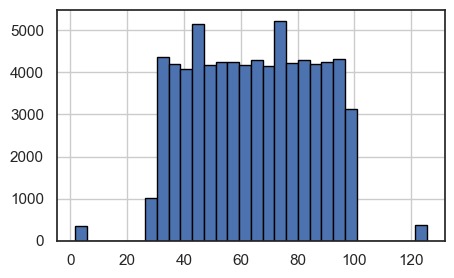

In [49]:
# Check outliers for paint_quality
train_data['paint_quality'].hist(figsize = (5, 3), bins = 30, edgecolor = 'black')
plt.show()

Since the values bigger than 100 and the values close to 0 seem to represent outliers, we should treat them later on during the handling of outliers.

### 5.2.3. has_damage: is always 0. No car damage?

In [50]:
# Check the price when has_damage = 0
train_data[train_data.has_damage == False].price.describe()

count     74421.000000
mean      16883.327287
std        9749.731793
min         450.000000
25%       10200.000000
50%       14698.000000
75%       20950.000000
max      159999.000000
Name: price, dtype: float64

In [51]:
# Check the price when has_damage = 1
train_data[train_data.has_damage == True].price.describe()

count     1548.000000
mean     16818.284238
std       9110.626140
min        899.000000
25%      10291.000000
50%      14798.000000
75%      20999.000000
max      82099.000000
Name: price, dtype: float64

We were thinking if we could create a threshold for which we consider that is 1, i.e., if the price is lower than x, we assume that the car has damage. But it doesn't work, because the lower price for the 1's is bigger than the lower price for the 0's.

In [52]:
# Doing the correlation matrix for the numerical columns
correlation_list = numeric_columns+['price']
correlation_matrix = train_data[correlation_list].corr()
correlation_matrix

,mileage,tax,mpg,engine_size,paint_quality,previous_owners,has_damage,price
mileage,1.000000,-0.210213,0.175413,0.103958,-0.001487,-0.003418,-0.000456,-0.416907
tax,-0.210213,1.000000,-0.427959,0.260755,0.005715,-0.007019,0.006059,0.301358
mpg,0.175413,-0.427959,1.000000,-0.227508,-0.002423,0.000074,-0.003875,-0.286747
engine_size,0.103958,0.260755,-0.227508,1.000000,0.005100,-0.006193,0.002849,0.612244
paint_quality,-0.001487,0.005715,-0.002423,0.005100,1.000000,-0.001820,-0.000963,0.000243
previous_owners,-0.003418,-0.007019,0.000074,-0.006193,-0.001820,1.000000,-0.003041,-0.001554
has_damage,-0.000456,0.006059,-0.003875,0.002849,-0.000963,-0.003041,1.000000,-0.000944
price,-0.416907,0.301358,-0.286747,0.612244,0.000243,-0.001554,-0.000944,1.000000


The has_damage column is having an almost null correlation with price, meaning that having damage or not influences the price little to nothing.

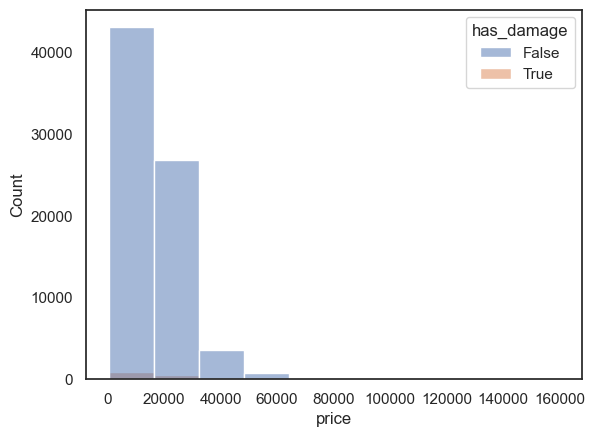

In [53]:
sns.histplot(train_data, x = 'price', hue = 'has_damage', bins = 10)
plt.show()

As we can see in the above histplot, the distribution for False or Nan (True) is similar, which means again that there is no difference in price in having or not damage. We're choosing to replace every Nan value in has_damage for 0, so the column is irrelevant. We'll drop it once we do feature selection.

## 5.3. Remove outliers

In [54]:
numeric_columns.remove('has_damage')
categorical_columns.append('has_damage')
print(f'All columns: {list(independent_columns)} \nNumerical: {numeric_columns} \nCategorical: {categorical_columns}')

All columns: ['brand', 'model', 'year', 'transmission', 'mileage', 'fuel_type', 'tax', 'mpg', 'engine_size', 'paint_quality', 'previous_owners', 'has_damage'] 
Numerical: ['mileage', 'tax', 'mpg', 'engine_size', 'paint_quality', 'previous_owners'] 
Categorical: ['brand', 'model', 'transmission', 'fuel_type', 'year', 'has_damage']


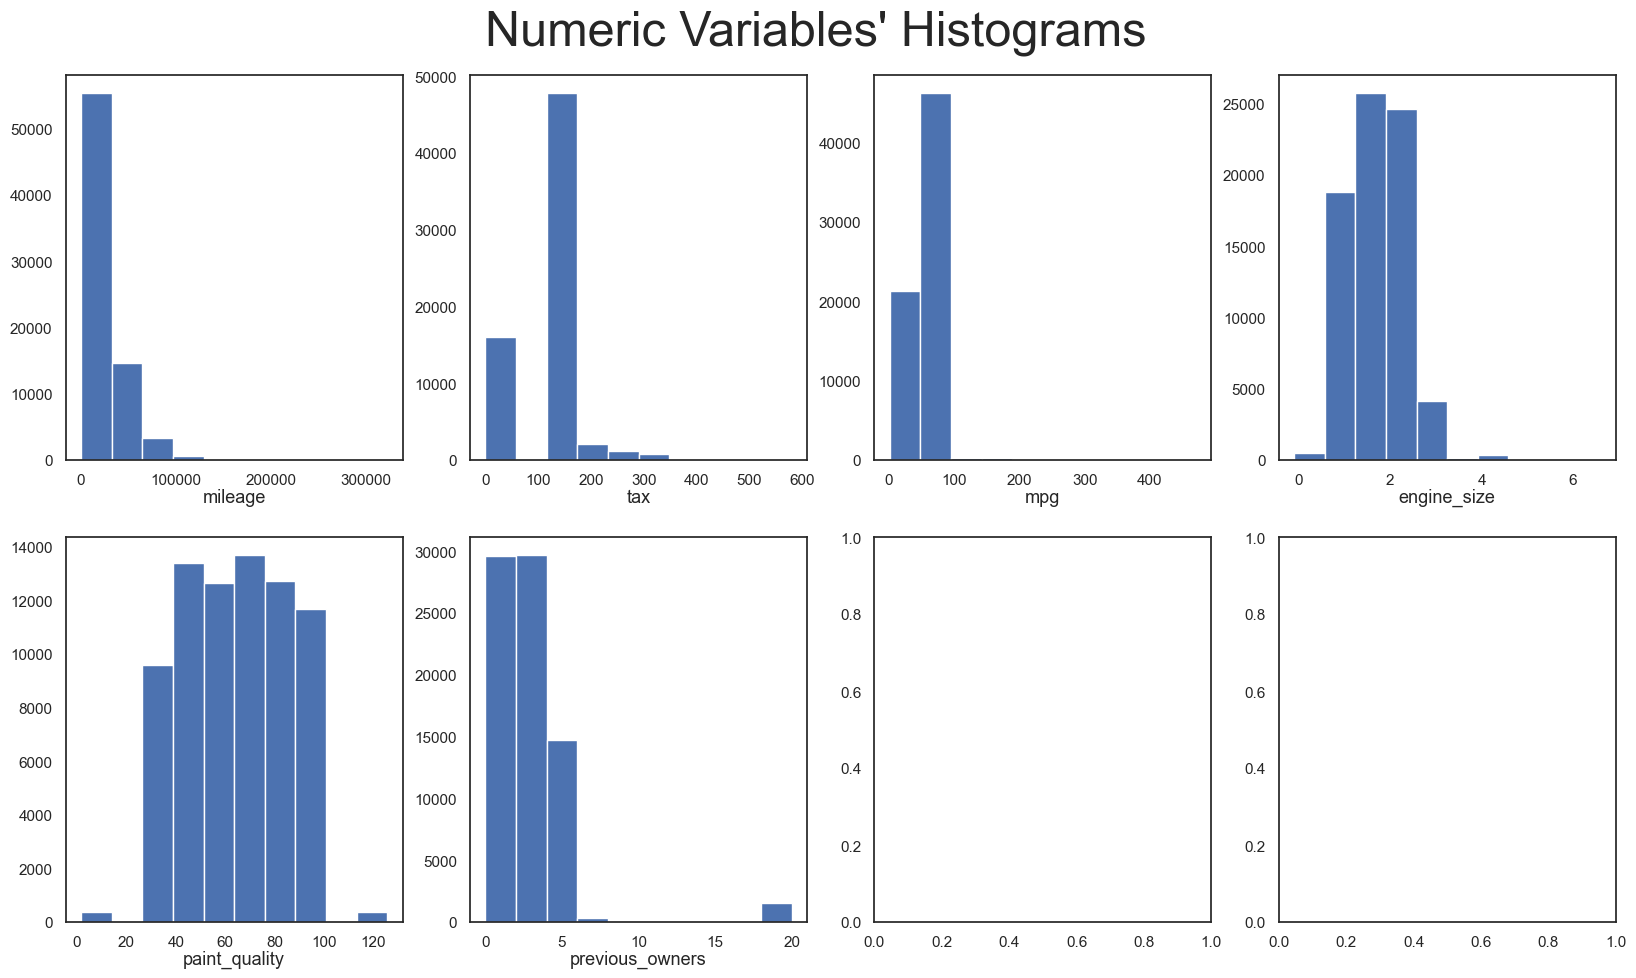

In [55]:
# Plot ALL Numeric Variables' Histograms in one figure
sp_rows = 2
sp_cols = 4

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), numeric_columns):
    ax.hist(train_data[feat])
    ax.set_title(feat, y=-0.13, fontsize=13)
    
# Layout
title = "Numeric Variables' Histograms"
plt.suptitle(title, y=.94, fontsize=35)

plt.show()

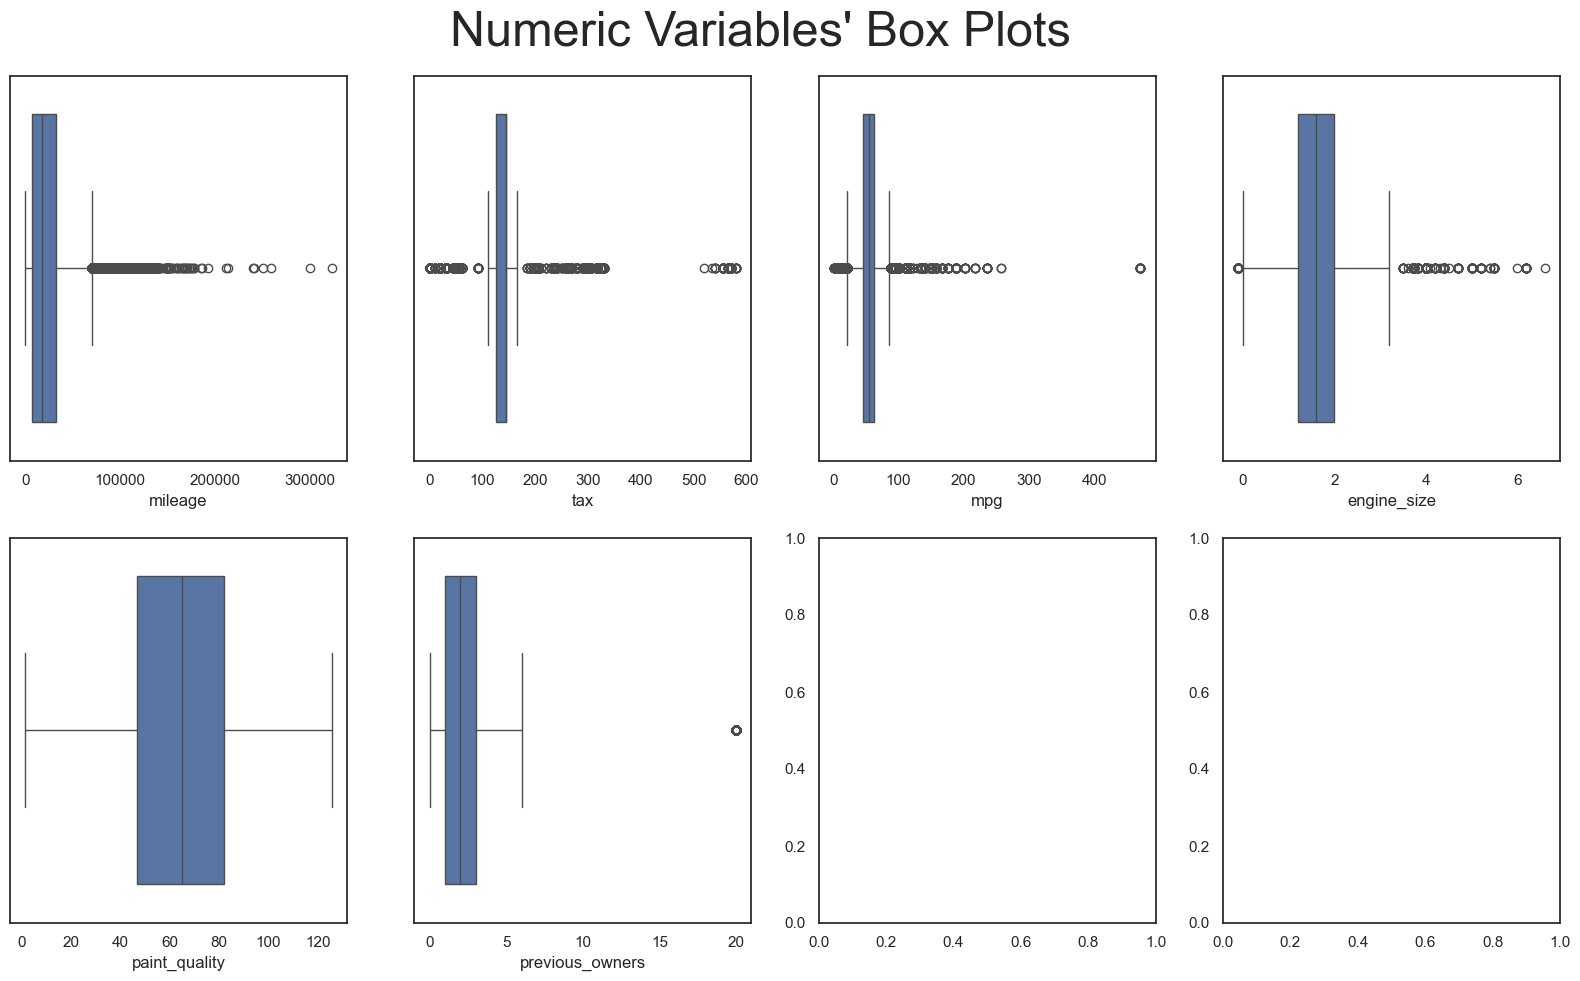

In [56]:
# Plot ALL Numeric Variables' Boxplots in one figure

sp_rows = 2
sp_cols = 4

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each boxplot:
for ax, feat in zip(axes.flatten(), numeric_columns):
    sns.boxplot(x=train_data[feat], ax=ax)
    
# Layout
title = "Numeric Variables' Box Plots"
plt.suptitle(title, y=.94, fontsize=35)

plt.show()

`Mileage, tax, mpg, engine size:` have a few outliers that we can remove

`Paint quality:` should not be over 100

## 5.4. Data separation

In [ ]:
X = train_data.loc[:, list(independent_columns)]
y = train_data.loc[:,'price']

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size = 0.7, shuffle = True)

## 5.5. Fill missing values

In [ ]:
#for column in categorical_columns:
 #   X_train[column] = X_train[column].fillna('Unknown')
  #  X_validation[column] = X_validation[column].fillna('Unknown')

In [ ]:
# Turn strings into the NaN in the categorical columns
for column in categorical_columns:
    X_train[column].replace('nan', np.nan, inplace=True)

In [ ]:
# Bring back the NaN values in year, previous_owners and has_damage
X_train.year.replace(0, np.nan, inplace=True)
X_train.previous_owners.replace(1000, np.nan, inplace=True)
X_train.has_damage.replace(True, np.nan, inplace=True)

In [ ]:
X_train.isna().sum()

We need to fix: numeric and categorical columns.

In [ ]:
# Calculate the mean for each metric feature
means = X_train[numeric_columns].mean()

# Calculate the median for each metric feature
medians = X_train[numeric_columns].median()

In [ ]:
# Do an histogram for each metric feature to choose which method we will use to fill the missing values with
X_train[numeric_columns].hist(
    figsize = (15, 10),
    bins = 30,
    edgecolor = 'black',
)

plt.show()

### 5.5.1. Year

In [ ]:
year = X_train.year
mean_year = means.year
median_year = medians.year

In [ ]:
fig, ax = plt.subplots()

sns.histplot(year, bins=20)

ax.axvline(mean_year, color='black', linewidth=2)
ax.axvline(median_year, color='red', linewidth=2)

plt.show()

In [ ]:
print(f'Mean: {mean_year} \nMedian: {median_year}')

Since they're (almost) the same:

In [ ]:
X_train.year = X_train.year.fillna(round(mean_year))

And,

In [ ]:
X_validation.year = X_validation.year.fillna(round(mean_year))

### 5.5.2. Mileage

In [ ]:
mileage = X_train.mileage
mean_mileage = means.mileage
median_mileage = medians.mileage

In [ ]:
fig, ax = plt.subplots()

sns.histplot(mileage, bins=20)

ax.axvline(mean_mileage, color='black', linewidth=2)
ax.axvline(median_mileage, color='red', linewidth=2)

plt.show()

In [ ]:
print(f'Mean: {mean_mileage} \nMedian: {median_mileage}')

Let's change into the median: ??????????????????????????????????????????????????????????????????????????????????????????????????

In [ ]:
X_train.mileage = X_train.mileage.fillna(round(median_mileage))

And,

In [ ]:
X_validation.mileage = X_validation.mileage.fillna(round(median_mileage))

### 5.5.3. Tax

In [ ]:
tax = X_train.tax
mean_tax = means.tax
median_tax = medians.tax

In [ ]:
fig, ax = plt.subplots()

sns.histplot(tax, bins=20)

ax.axvline(mean_tax, color='black', linewidth=2)
ax.axvline(median_tax, color='red', linewidth=2)

plt.show()

In [ ]:
print(f'Mean: {mean_tax} \nMedian: {median_tax}')

Let's change into the median: ??????????????????????????????????????????????????????????????????????????????????????????????????

In [ ]:
X_train.tax = X_train.tax.fillna(round(median_tax))

And,

In [ ]:
X_validation.tax = X_validation.tax.fillna(round(median_tax))

### 5.5.4. Mpg

In [ ]:
mpg = X_train.mpg
mean_mpg = means.mpg
median_mpg = medians.mpg

In [ ]:
fig, ax = plt.subplots()

sns.histplot(mpg, bins=10)

ax.axvline(mean_mpg, color='black', linewidth=2)
ax.axvline(median_mpg, color='red', linewidth=2)

plt.show()

In [ ]:
print(f'Mean: {mean_mpg} \nMedian: {median_mpg}')

Since they're (almost) the same:

In [ ]:
X_train.mpg = X_train.mpg.fillna(round(mean_mpg))

And,

In [ ]:
X_validation.mpg = X_validation.mpg.fillna(round(mean_mpg))

### 5.5.5. Engine size

In [ ]:
engine_size = X_train.engine_size
mean_engine_size = means.engine_size
median_engine_size = medians.engine_size

In [ ]:
fig, ax = plt.subplots()

sns.histplot(engine_size, bins=10)

ax.axvline(mean_engine_size, color='black', linewidth=2)
ax.axvline(median_engine_size, color='red', linewidth=2)

plt.show()

In [ ]:
print(f'Mean: {mean_engine_size} \nMedian: {median_engine_size}')

Since they're (almost) the same:

In [ ]:
X_train.engine_size = X_train.engine_size.fillna(round(median_engine_size))

And,

In [ ]:
X_validation.engine_size = X_validation.engine_size.fillna(round(median_engine_size))

### 5.5.6. Paint quality

In [ ]:
paint_quality = X_train['paint_quality']
mean_paint_quality = means['paint_quality']
median_paint_quality = medians['paint_quality']

In [ ]:
fig, ax = plt.subplots()

sns.histplot(paint_quality, bins=20)

ax.axvline(mean_paint_quality, color='black', linewidth=2)
ax.axvline(median_paint_quality, color='red', linewidth=2)

plt.show()

In [ ]:
print(f'Mean: {mean_paint_quality} \nMedian: {median_paint_quality}')

Since they're (almost) the same:

In [ ]:
X_train['paint_quality'] = X_train['paint_quality'].fillna(round(median_paint_quality))

And,

In [ ]:
X_validation['paint_quality'] = X_validation['paint_quality'].fillna(round(median_paint_quality))

### 5.5.7. Previous owners

In [ ]:
previous_owners = X_train.previous_owners
mean_previous_owners = means.previous_owners
median_previous_owners = medians.previous_owners

In [ ]:
fig, ax = plt.subplots()

sns.histplot(previous_owners, bins=30)

ax.axvline(mean_previous_owners, color='black', linewidth=2)
ax.axvline(median_previous_owners, color='red', linewidth=2)

plt.show()

In [ ]:
print(f'Mean: {mean_previous_owners} \nMedian: {median_previous_owners}')

Since they're (almost) the same:

In [ ]:
X_train.previous_owners = X_train.previous_owners.fillna(round(median_previous_owners))

And,

In [ ]:
X_validation.previous_owners = X_validation.previous_owners.fillna(round(median_previous_owners))

### <span style='color: red;'>5.5.8. Has damage</span> 

Don't know how to do this one, because it's always 0. Should we assume that when it doesn't say it's 0 or 1<span style='color: red;'>?????????????????????????????????????????</span>

Foi substituido por True, sem querer...

### 5.5.9. Brand

In [ ]:
# Sort the dataframe by model and brand to easily identify similar entries
X_train.sort_values(by=['model', 'brand'], ascending=[True, True], inplace=True)
X_train

In [ ]:
# Save the DataFrame to a CSV file at the specified path
#train_data OU X_train
#train_data.to_csv(r'C:\Users\mafal\Documents\MSc Data Science\1st Semester\Machine Learning\Project\train_data_sorted.csv', index=False)

In [ ]:
# Create a mask where 'model' is not NaN
mask = X_train['model'].notna()
mask

In [ ]:
# Before filling missing values, let's save the indexes that we need to fill, so we can confirm they were changed right
index_no_brand = list(X_train[X_train.brand.isna()].index)

In [ ]:
# Fill missing brand values by forward filling from previous entries but only if model is not NaN
X_train.loc[mask, 'brand'] = X_train.loc[mask, 'brand'].ffill()

<span style='color: red;'>Como é que fazemos para X_validation? Criamos uma função que percorre o brands_to_models e ve que brand tem aquele model?</span> 

In [ ]:
# Confirming the new brands match the corresponding model. It would return the rows in which the brand and model don't match.
for i in index_no_brand:                             # We can also do: for i in X_train.index
    if str(X_train.loc[i].brand) != 'nan':
        if str(X_train.loc[i].model) != 'nan':
            condition1 = X_train.loc[i].model not in brand_to_model[X_train.loc[i].brand]
            condition2 = (X_train.loc[i].model != 'Unknown')
            condition3 = (X_train.loc[i].model != np.nan)
            if condition1 and condition2 and condition3:
                print(X_train.loc[i])

In [ ]:
# Save the DataFrame to a CSV file at the specified path
#train_data.to_csv(r'C:\Users\mafal\Documents\MSc Data Science\1st Semester\Machine Learning\Project\train_data_brand_clean.csv', index=False)

### 5.5.10. Model

Sabendo só a marca é impossivel determinar a que marca o carro pertence.
<span style='color: red;'>O que fazemos a esses dados?</span>

### 5.5.11.Transmission

<span style='color: red;'>???</span>

### 5.5.12. Fuel type

<span style='color: red;'>???</span>

### 5.5.13. Confirmation

In [ ]:
X_train.isna().sum()

## 5.6. Feature engineering

In [ ]:
X_train.drop(columns = ['brand', 'model', 'transmission', 'fuel_type', 'has_damage']).corr(method = 'spearman')

To note:
- The linear correlation between mileage and year is strangely high.

## 5.7. Normalize data

# 6. Function with every change so far

# 7. Modelling (create a predictive model)

In [ ]:
#dt = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
#predictions_train = dt.predict(X_train)

In [ ]:
#predictions_val = dt.predict(X_validation)

# 8. Assess (evaluate model)

In [ ]:
#dt.score(X_train, y_train)         #should be 1

In [ ]:
#dt.score(X_validation, y_validation)

In [ ]:
#confusion_matrix(y_train, predictions_train)

In [ ]:
#confusion_matrix(y_validation, predictions_val)

# 9. Deploy (apply to real data)

In [ ]:
#test_data

In [ ]:
#test_data['price'] = dt.predict(test_data)

In [ ]:
#test_data

In [ ]:
#test_data['price'].to_csv('project_data/project_predictions.csv')